# Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

In [1]:
import numpy as np
import pylab as plt 
import scipy.stats
from scipy.stats import norm

plt.style.use('seaborn-v0_8-deep')
plt.rc('text', usetex=True)  
%matplotlib inline
%config InlineBackend.figure_format='retina'

### Part 1

In [2]:
mu = 1
sigma = 0.2
N = 8
np.random.seed(10)
logsum = np.zeros(N)

Define the Gaussian distribution of the underlying process.

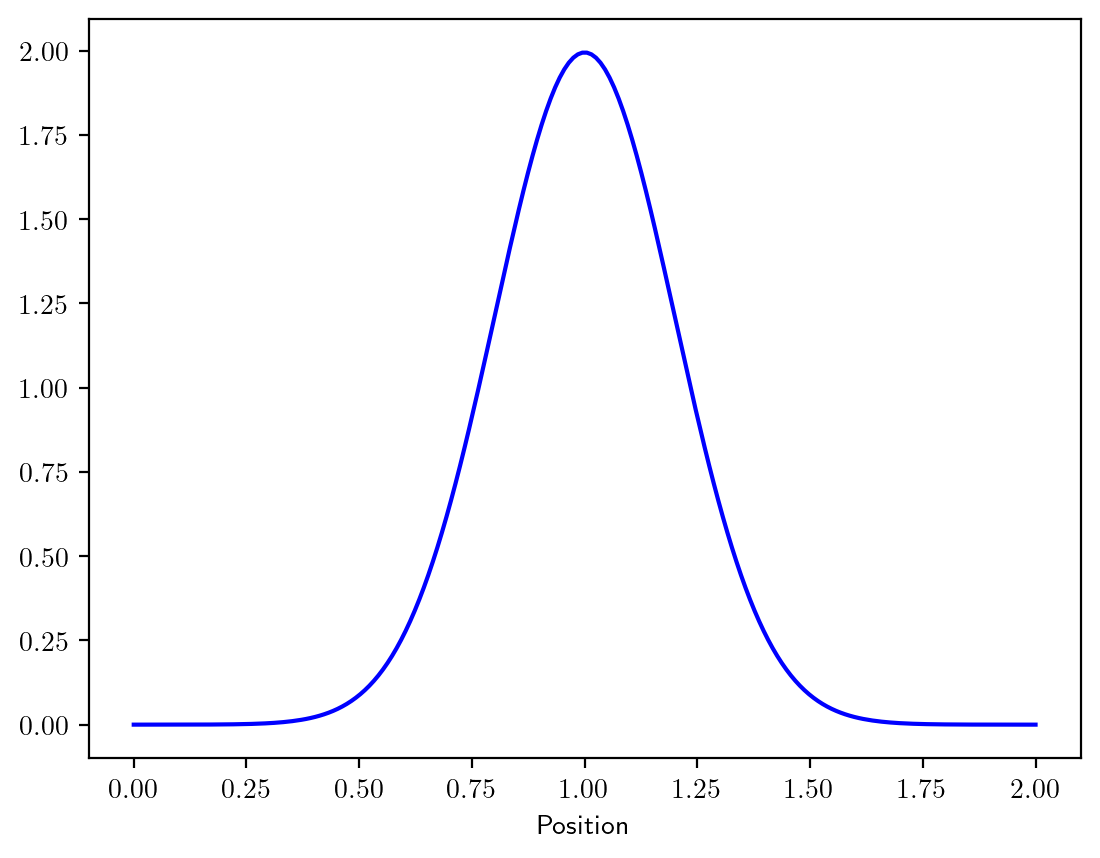

In [3]:
gauss = norm(loc=mu, scale=sigma)

N_grid = 200
mu_grid = np.linspace(0,2,N_grid)
plt.plot(mu_grid, gauss.pdf(mu_grid), color='blue', label='Underlying distribution')
plt.xlabel('Position')
plt.show()

Generate fake measurements based on the distribution (draw the mu from the gaussian, sigma fixed).

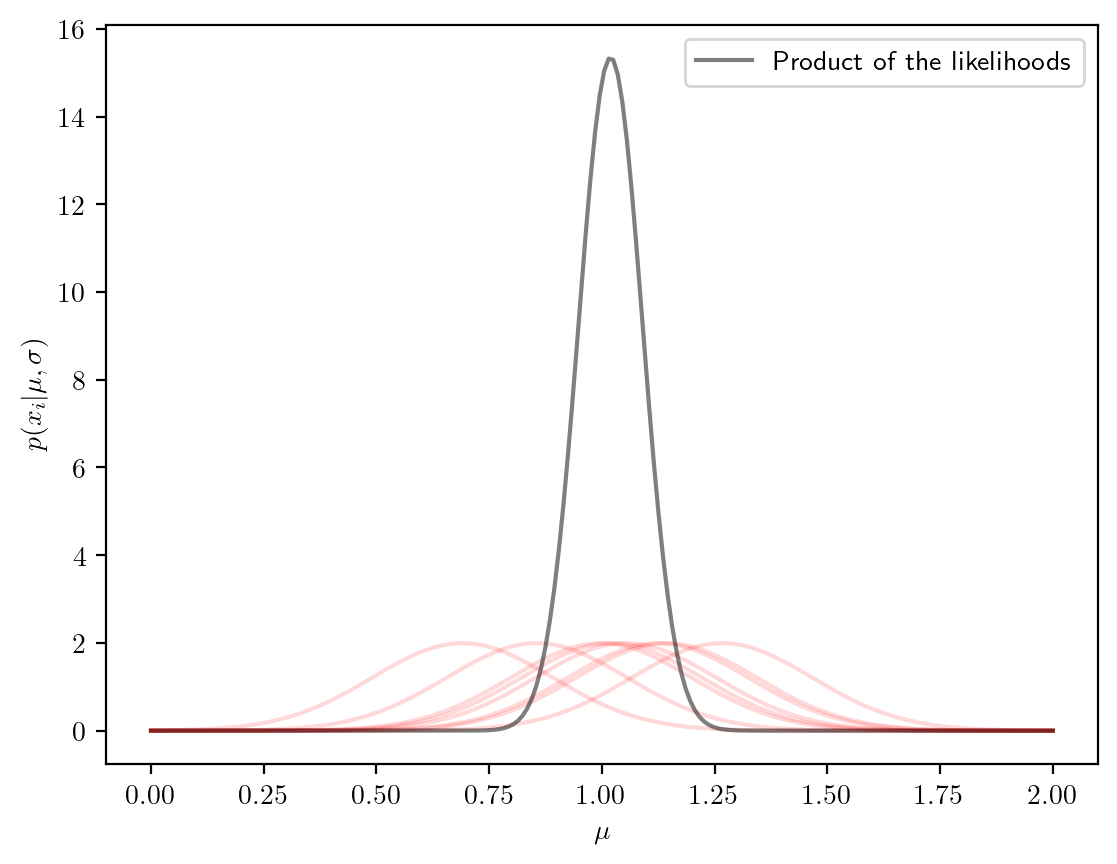

In [4]:
measurements = gauss.rvs(size=N)

# Compute and plot the Likelihood for each measurement
L_i = np.array([norm(loc=meas,scale=sigma).pdf(np.linspace(0,2,N_grid)) for meas in measurements])

for L in L_i:
    plt.plot(mu_grid, L, color="red", alpha=0.15)

# Compute the total likelihood and the logL
L = np.prod(L_i,axis=0)
logL = np.sum(np.log(L_i),axis=0)

plt.plot(mu_grid, L, color="k", alpha=0.5, label='Product of the likelihoods')

plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show()

Compute the log likelihood and find the max.

The Likelihood is maximized at 1.015
The MLE estimator is 1.019±0.071


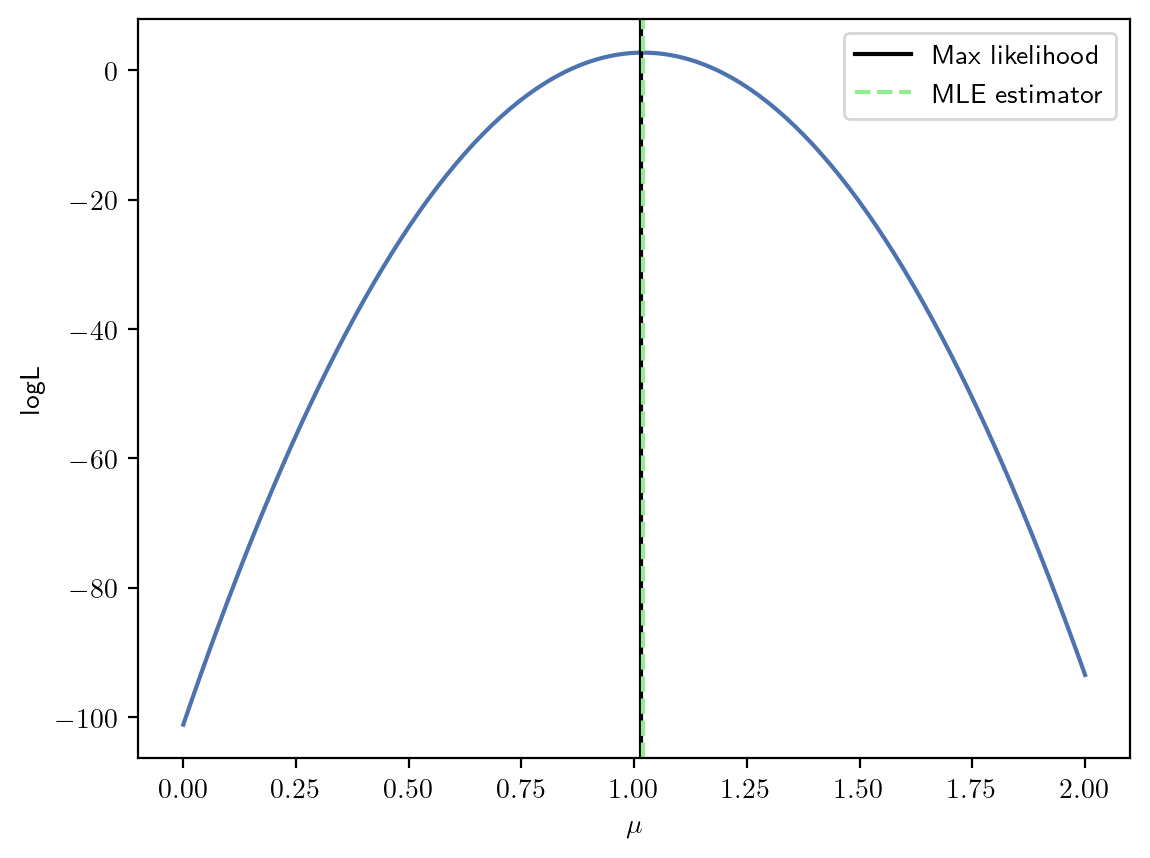

In [5]:
plt.plot(mu_grid, logL)

mu_max = mu_grid[np.argmax(logL)]
print("The Likelihood is maximized at %.3f" % mu_max)

MLE_mean = np.mean(measurements)
MLE_sigma = sigma/np.sqrt(N)
print(r'The MLE estimator is %.3f±%.3f' % (MLE_mean, MLE_sigma))

plt.axvline(mu_max,c='k',label='Max likelihood')
plt.axvline(MLE_mean, c='lightgreen',ls='--',label='MLE estimator')
plt.xlabel(r'$\mu$')
plt.ylabel(r'logL')
plt.legend()
plt.show()

### Part 2

Check if the Fisher matrix error estimate makes sense (comparing it to the MLE estimator).

In [6]:
delta_grid = (mu_grid[1]-mu_grid[0])**2
fisher_sigma = -1* np.diff(logL, n=2) / delta_grid
fisher_sigma = 1/np.sqrt(fisher_sigma)[0]

print("Fisher matrix error on estimated mean: %.3f" % fisher_sigma)
print("MLE estimator error: %.3f" % MLE_sigma)

Fisher matrix error on estimated mean: 0.071
MLE estimator error: 0.071


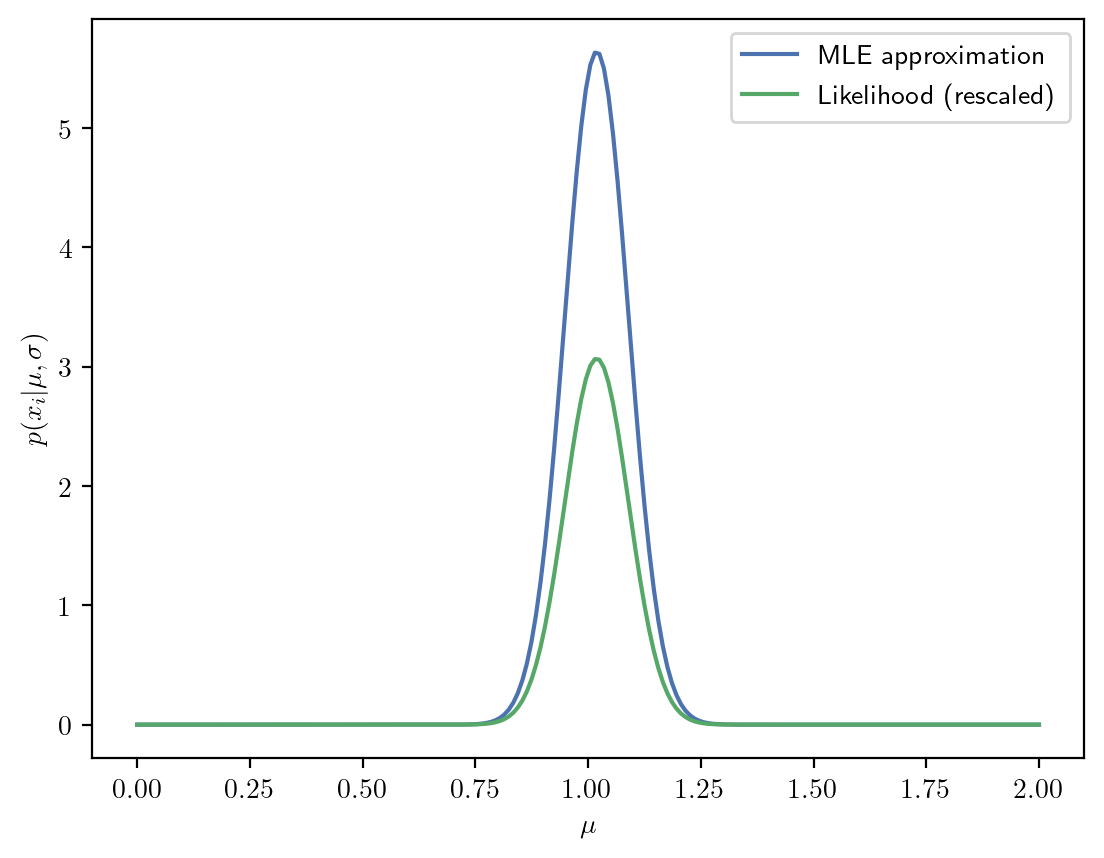

In [7]:
gauss_approx = norm(loc=MLE_mean, scale=MLE_sigma)
plt.plot(mu_grid, gauss_approx.pdf(mu_grid), label='MLE approximation')
plt.plot(mu_grid, L/5, label='Likelihood (rescaled)')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show()

### Part 3

Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$.

In [8]:
mu = 1

# Distribution of the sigma
mean_sigma = 0.2
sigma_sigma = 0.05

N = 8
np.random.seed(10)
logsum = np.zeros(N)

Generate fake measurements (with their sigma) based on the distribution.

In [9]:
N_grid = 400
mu_grid = np.linspace(0,2,N_grid)

gauss_sigma = norm(loc=mean_sigma, scale=sigma_sigma)
sigmas = gauss_sigma.rvs(size=N)

measurements = np.concatenate([norm(loc=mu, scale=sigma).rvs(1) for sigma in sigmas])

Compute and plot the Likelihood for each measurement

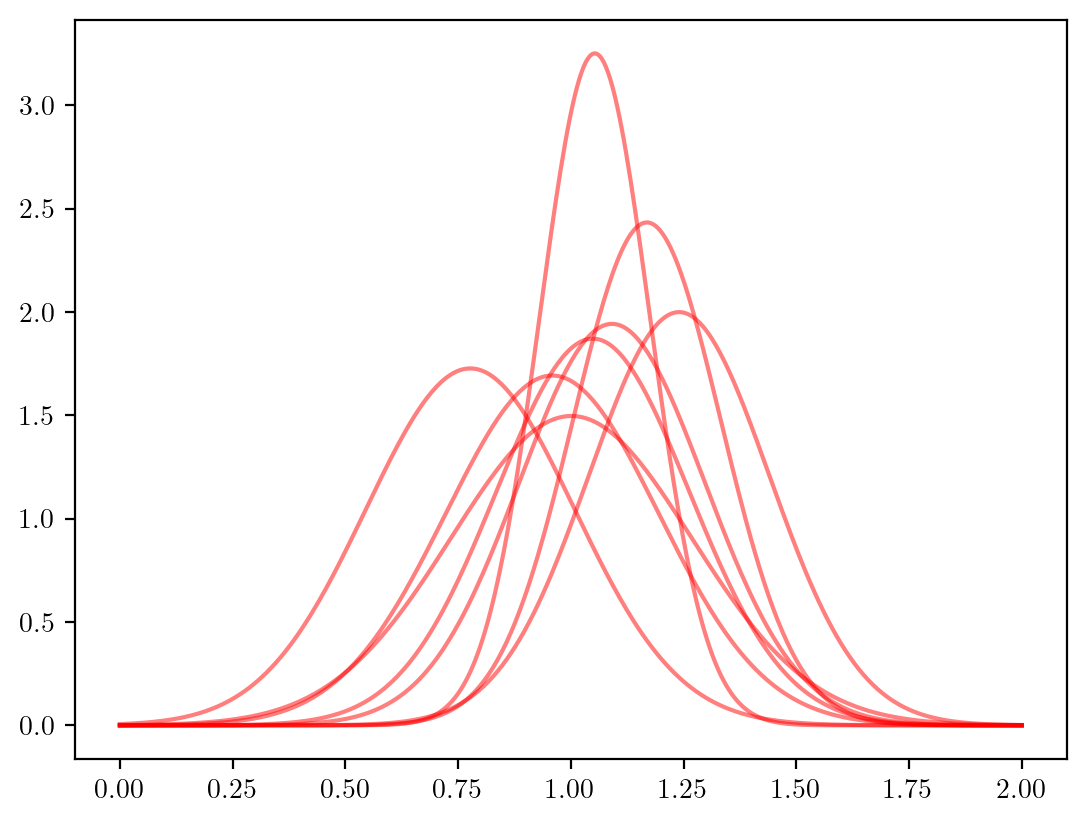

In [10]:
L_i = np.array([norm(loc=meas, scale=sigma).pdf(np.linspace(0, 2, N_grid)) 
                for meas, sigma in zip(measurements, sigmas)])
for L in L_i:
    plt.plot(mu_grid, L, color="red", alpha=0.5)

Compute the total likelihood and the logL

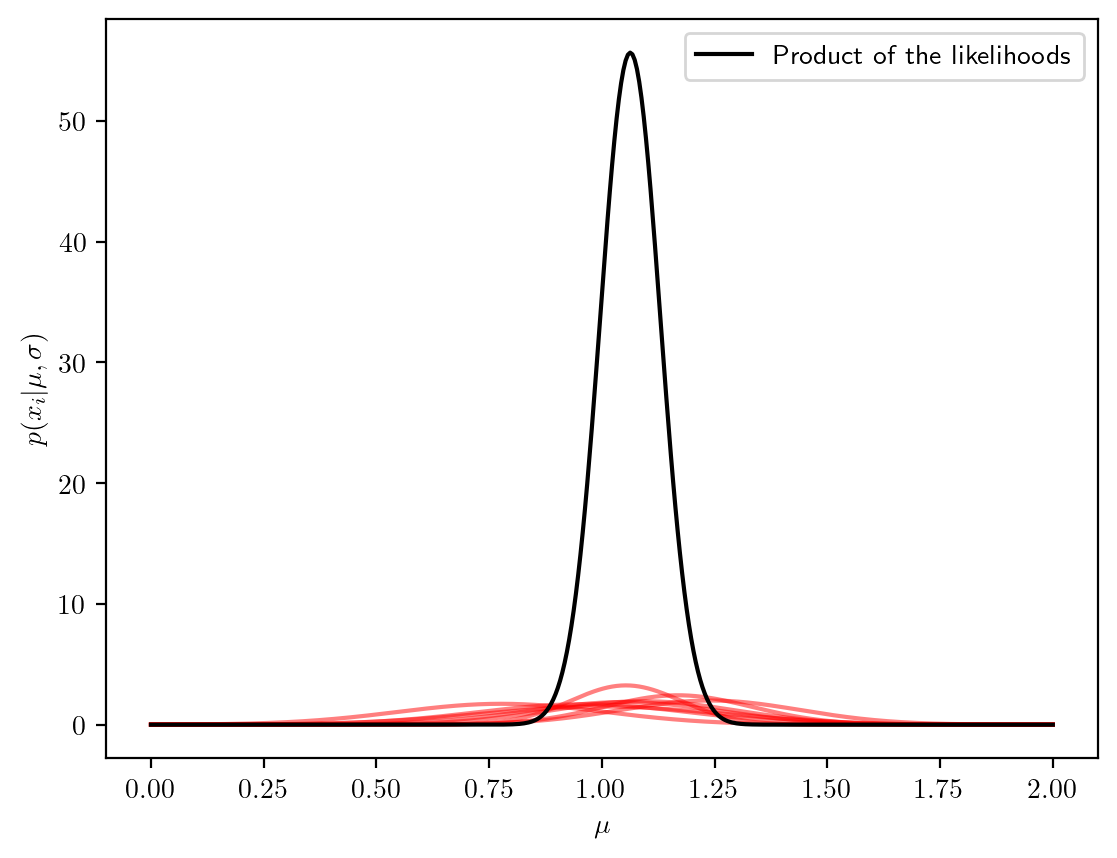

In [11]:
L = np.prod(L_i,axis=0)
logL = np.sum(np.log(L_i),axis=0)

for Li in L_i:
    plt.plot(mu_grid, Li, color="red", alpha=0.5)
plt.plot(mu_grid, L, color="k", alpha=1, label='Product of the likelihoods')

plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show()

Compute estimator for mu and sigma. NB: for the mu now the mean is weighted.

The Likelihood is maximized at 1.063
The MLE estimator is 1.063±0.067


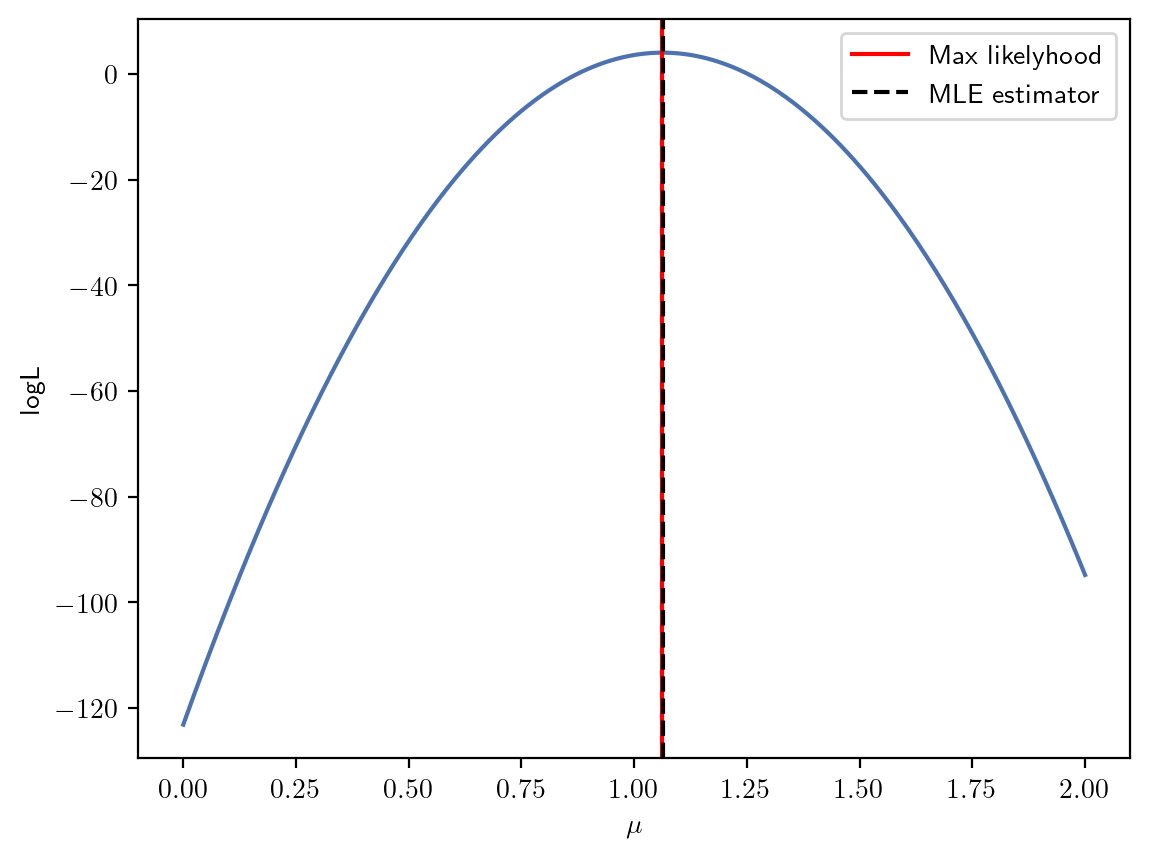

In [12]:
plt.plot(mu_grid, logL)

mu_max = mu_grid[np.argmax(logL)]
print("The Likelihood is maximized at %.3f" % mu_max)

MLE_mean = np.average(measurements,weights=1/sigmas**2)
MLE_sigma = np.sum(sigmas**-2)**-0.5
print(r'The MLE estimator is %.3f±%.3f' % (MLE_mean, MLE_sigma))

plt.axvline(mu_max,c='red',label='Max likelyhood')
plt.axvline(MLE_mean,c='k',ls='--',label='MLE estimator')
plt.xlabel(r'$\mu$')
plt.ylabel(r'logL')
plt.legend()
plt.show()

Fisher matrix error on estimated mean: 0.067
MLE estimator error: 0.067


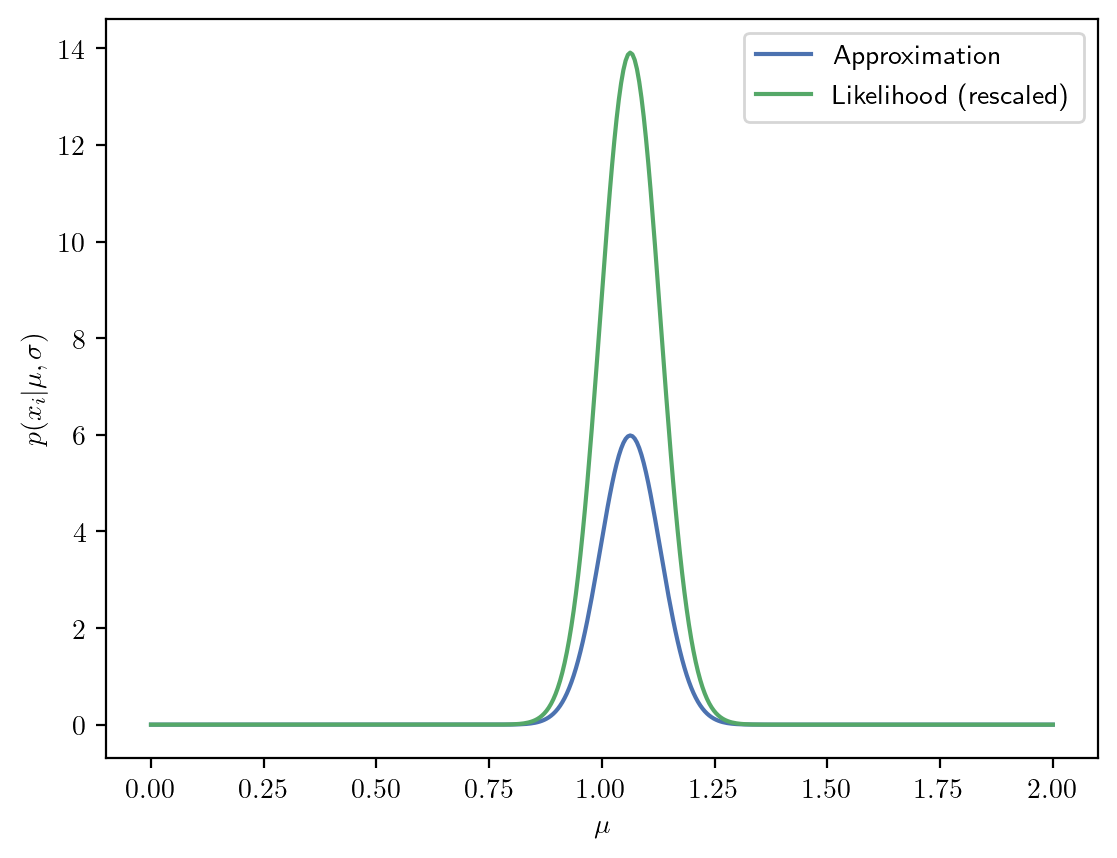

In [13]:
delta_grid = (mu_grid[1]-mu_grid[0])**2
fisher_sigma = -1* np.diff(logL, n=2) / delta_grid
fisher_sigma = 1/np.sqrt(fisher_sigma)[0]

print("Fisher matrix error on estimated mean: %.3f" % fisher_sigma)
print("MLE estimator error: %.3f" % MLE_sigma)

gauss_approx = norm(loc=MLE_mean, scale=MLE_sigma)
plt.plot(mu_grid, gauss_approx.pdf(mu_grid), label='Approximation')
plt.plot(mu_grid, L/4, label='Likelihood (rescaled)')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show()